<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p><strong>معرفی فیلترها در ASP.NET Core و فلسفه وجودی آنها</strong></p>

<p>در معماری ASP.NET Core، فیلترها (Filters) مکانیزمی هستند که به شما اجازه می‌دهند منطق خاصی را قبل یا بعد از اجرای اکشن متدهای کنترلر اعمال کنید. این قابلیت شما را قادر می‌سازد تا بدون نیاز به تکرار کد در هر اکشن یا کنترلر، وظایف متقاطع (Cross-Cutting Concerns) را به صورت متمرکز مدیریت نمایید. هدف اصلی استفاده از فیلترها، جدا کردن منطق جانبی یا تکراری از بدنه اصلی اکشن‌ها است. این امر به حفظ اصل جداسازی نگرانی‌ها (Separation of Concerns) و افزایش قابلیت نگهداری و تست‌پذیری کد کمک شایانی می‌کند.</p>

<p><strong>فلسفه وجودی فیلترها:</strong></p>

<ol><li><p><strong>کاهش کدنویسی تکراری:</strong><br>با استفاده از فیلترها، می‌توان اعمالی نظیر احراز هویت، بررسی مجوزها، ثبت لاگ، مدیریت کش، و هندل کردن خطاها را به صورت متمرکز تعریف کرد و بدین ترتیب در کنترلرها و اکشن‌ها از تکرار این منطق جلوگیری کرد.</p></li><li><p><strong>یکپارچگی و سازمان‌دهی بهتر کد:</strong><br>جدا شدن وظایف مختلف در لایه‌های مجزا، باعث تمیزتر و خواناتر شدن کد می‌شود. این تفکیک منجر به قابلیت نگهداری بهتر و تغییرپذیری ساده‌تر خواهد شد.</p></li><li><p><strong>انعطاف‌پذیری بالا:</strong><br>فیلترها در سطوح مختلف (جهانی، کنترلر، و اکشن) قابل اعمال‌اند. این قابلیت امکان تنظیم دقیق اعمال فیلترها بسته به نیازمندی‌های پروژه را فراهم می‌کند.</p></li><li><p><strong>کاهش ریسک خطا:</strong><br>با متمرکز کردن منطق‌هایی مانند مدیریت استثناها، نیاز به تکرار این منطق در هر اکشن از بین می‌رود که این امر خطایابی را آسان‌تر کرده و از پخش شدن مشکلات در نقاط مختلف کد جلوگیری می‌کند.</p></li></ol>
<div>

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p dir="ltr"><strong>Types of <code>Filters</code> in asp.net core</strong></p>
<ol>
<li>
<strong><code>Authorization Filters</code></strong>
<p><strong>وظیفه اصلی:</strong> بررسی احراز هویت و مجوز دسترسی کاربر قبل از اجرای اکشن.<br><strong>زمان اجرا:</strong> پیش از دیگر فیلترها.<br>با کمک این فیلترها، می‌توانید تعیین کنید که آیا کاربر به منبع یا اکشن موردنظر دسترسی دارد یا خیر. اگر کاربر مجاز نباشد، اجرای درخواست در همین مرحله متوقف شده و پاسخ مناسب (نظیر کد وضعیت 403 یا ریدایرکت به صفحه لاگین) برگردانده می‌شود.</p>
</li>
<li>
<strong><code>Resource Filters</code></strong>
<p><strong>وظیفه اصلی:</strong> مدیریت منابع و ایجاد محیط مناسب برای اجرا، پیش از مرحله‌ی Bind شدن داده‌ها و اجرای اکشن.<br><strong>زمان اجرا:</strong> قبل و بعد از تعیین اکشن و قبل از انجام عملیات Model Binding.<br>این فیلترها می‌توانند برای وظایفی مانند کش کردن پاسخ‌ها، ایجاد و حذف اشیاء یا کنترل‌هایی که پیش از اجرای اکشن مورد نیاز است، مورد استفاده قرار گیرند. همچنین اگر در این مرحله متوجه شوید که داده‌ها از پیش کش شده‌اند، می‌توانید از اجرای اکشن جلوگیری و مستقیماً پاسخ را ارائه کنید.</p>
</li>
<li>
<strong><code>Action Filters</code></strong>
<p><strong>وظیفه اصلی:</strong> اعمال منطق قبل و بعد از اجرای خود اکشن متد.<br><strong>زمان اجرا:</strong> بلافاصله قبل و بعد از فراخوانی متد اکشن کنترلر.<br>از این فیلترها برای ثبت لاگ، اندازه‌گیری زمان اجرای اکشن، اعتبارسنجی ورودی‌ها و یا هر گونه منطق دیگری که باید درست قبل یا بعد از اجرای اکشن اعمال شود استفاده می‌گردد. برای مثال، قبل از اجرا می‌توانید برخی کنترل‌ها انجام دهید و بعد از اجرا نتایج را پردازش یا ثبت کنید.</p>
</li>
<li>
<strong><code>Exception Filters</code></strong>
<p><strong>وظیفه اصلی:</strong> مدیریت خطاها و استثناء‌هایی که در طول اجرای اکشن یا دیگر فیلترها رخ می‌دهد.<br><strong>زمان اجرا:</strong> در صورت رخ دادن یک استثناء در روند اجرای اکشن یا فیلترهای قبلی.<br>با استفاده از این فیلترها می‌توانید استثناءها را ثبت لاگ کرده، یک پاسخ خطای مناسب (مثل JSON با پیام خطا یا نمایش یک صفحه خطا) بازگردانید. این باعث می‌شود که منطق رسیدگی به خطا در یک نقطه متمرکز باشد.</p>

</li>
<li>
<strong><code>Result Filters</code></strong>
<p><strong>وظیفه اصلی:</strong> اعمال منطق قبل و بعد از پردازش نتیجه (Result) بازگشتی از اکشن.<br><strong>زمان اجرا:</strong> پس از اجرای اکشن و قبل از ارسال نتیجه نهایی به کاربر.<br>نتیجه اکشن غالباً یک View یا یک پاسخ JSON، XML یا دیگر فرمت‌های خروجی است. Result Filters می‌توانند روی این خروجی اعمال شوند، برای مثال: افزودن هدرهای خاص به پاسخ HTTP، تغییر شکل پاسخ، کش کردن نتیجه، یا ثبت اطلاعات مربوط به نتیجه در لاگ.</p>
</li>
</ol>
<p><strong>نگاه کلی:</strong></p>
<ul><li><strong>اول:</strong> <code>Authorization Filters</code> برای تعیین دسترسی کاربر.</li><li><strong>سپس:</strong> <code>Resource Filters</code> برای مدیریت منابع و محیط اجرا.</li><li><strong>بعد از آن:</strong> <code>Action Filters</code> برای منطق پیرامون اکشن‌ها.</li><li><strong>در صورت خطا:</strong> <code>Exception Filters</code> برای رسیدگی به استثناءها.</li><li><strong>در پایان:</strong> <code>Result Filters</code> برای دستکاری نتیجه نهایی قبل از ارسال به کاربر.</li></ul>
</div>

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p dir="ltr"><strong><code>Pipeline</code> of Filters</strong></p>
<p>در ASP.NET Core، درخواست (Request) پس از ورود به برنامه، از یک زنجیره میانی (Middleware) عبور می‌کند و در نهایت به نقطه‌ای می‌رسد که فریمورک MVC وارد عمل شده و کنترلر مناسب را برای پردازش درخواست فراخوانی می‌کند. در این بخش از جریان، فیلترهای MVC نقش کلیدی ایفا می‌کنند. به عبارت دیگر، پس از گذر از لایه‌های Middleware (مانند احراز هویت عمومی، استاتیک فایل‌ها، مسیریابی و ...) و تعیین اینکه کدام اکشن از کدام کنترلر اجرا شود، سلسله مراتبی از فیلترها اجرا شده و در نهایت اکشن فراخوانی می‌گردد.</p>
<p>این چرخه‌ی فیلترها را می‌توان به صورت یک "Pipeline درون Pipeline" در نظر گرفت. بدین معنا که هنگامی که درخواست به مرحله‌ی اجرای کنترلر و اکشن رسید، مجموعه‌ای از فیلترها پیش از اقدام به اجرای اکشن (و پس از آن) وارد عمل شده و منطق‌های مربوطه را اعمال می‌کنند. این امر موجب می‌شود تا منطق‌های سطح بالا (نظیر بررسی مجوز دسترسی، ثبت گزارشات، دستکاری نتایج و رسیدگی به استثناءها) بدون درگیر کردن کد اصلی اکشن قابل پیاده‌سازی باشند.</p>
<p><strong>ترتیب کلی اجرای فیلترها</strong></p>
<ol><li><p><code>Authorization Filters</code><br>نخستین مرحله از چرخه فیلترها شامل فیلترهای مجوز است. در این مرحله تصمیم گرفته می‌شود آیا کاربر اجازه‌ی دسترسی به اکشن موردنظر را دارد یا خیر. این فیلترها پیش از هر منطق دیگری اجرا می‌شوند تا در صورت عدم داشتن مجوز، اجرای اکشن را متوقف نموده و پاسخ مناسب (مانند خطای 403) را بازگردانند.</p></li><li><p><code>Resource Filters</code><br>پس از تأیید مجوزها، نوبت به Resource Filters می‌رسد. این فیلترها قبل و بعد از اجرای تصمیم‌گیری درباره اکشن و فراخوانی آن اجرا می‌شوند. آن‌ها می‌توانند برای وظایفی مانند کش کردن نتایج یا ایجاد و پاکسازی منابع خاص استفاده شوند. نکته مهم این است که Resource Filters معمولاً قبل از اینکه اکشن واقعاً Resolve (توسط Model Binding) و اجرا شود، عمل می‌کنند.</p></li><li><p><code>Action Filters </code><br>در مرحله‌ی بعد، فیلترهای اکشن قرار می‌گیرند. این فیلترها قبل از اجرای متد اکشن و پس از اجرای متد اکشن قابل اجرا هستند. آن‌ها اجازه می‌دهند تا منطق‌هایی مثل ثبت لاگ قبل از اجرا (OnActionExecuting) و بعد از اجرا (OnActionExecuted) پیاده‌سازی شود. اگر این فیلترها تشخیص دهند که نیاز به لغو اجرای اکشن است یا باید نتیجه‌ی دیگری بازگردانند، می‌توانند این کار را انجام دهند.</p></li><li><p><code>Action Execution</code><br>پس از عبور از فیلترهای اکشن، متد اکشن کنترلر فراخوانی شده و منطق تجاری (Business Logic) موردنظر اجرا می‌شود. در این مرحله داده‌ها پردازش می‌شوند و یک شیء نتیجه (Result) تولید می‌گردد. این نتیجه معمولاً یک کلاس که از IActionResult مشتق شده است، می‌باشد.</p></li><li><p><code>Result Filters</code><br>هنگامی که متد اکشن اجرای خود را به پایان رساند و یک نتیجه بازگرداند، نوبت به Result Filters می‌رسد. این فیلترها قبل و بعد از اجرای نتیجه (Render شدن View یا تولید JSON یا هر پاسخ دیگر) وارد عمل می‌شوند. اگر نیاز به اعمال تغییراتی بر روی نتیجه نهایی است (مانند اضافه کردن هدرهای خاص، تغییر فرمت پاسخ، یا کش کردن خروجی)، اینجا بهترین نقطه برای این کار است.</p></li><li><p><code>Exception Filters</code><br>اگر در حین اجرای اکشن یا فیلترها استثنایی رخ دهد که هندل نشده باشد، Exception Filters وارد عمل می‌شوند. این فیلترها در زنجیره اجرا، به صورت اضطراری (در صورت وقوع خطا) فراخوانی شده و با مدیریت خطا و تولید پاسخ مناسب (مثلاً یک نتیجه‌ی خطای استاندارد یا ریدایرکت به صفحه‌ی خطا) چرخه را تکمیل می‌کنند.</p></li></ol>
</div>

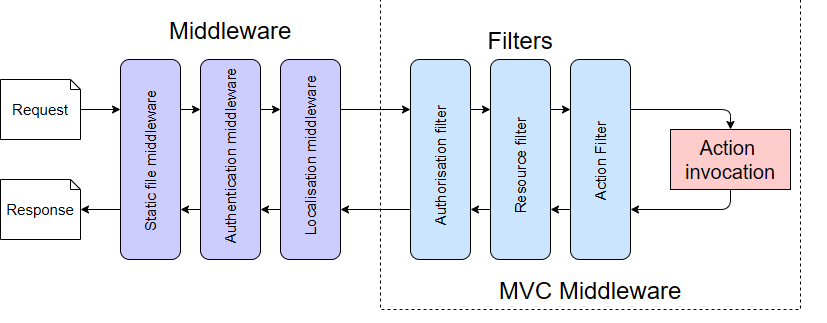

In [ ]:
AuthorizationFilter -> 
ResourceFilter (OnResourceExecuting) -> 
ActionFilter (OnActionExecuting) -> 
Action اجرا می‌شود > 
ActionFilter (OnActionExecuted) -> 
ExceptionFilter (در صورت خطا) -> 
ResultFilter (OnResultExecuting) -> 
نتیجه تولید می‌شود > 
ResultFilter (OnResultExecuted) -> 
ResourceFilter (OnResourceExecuted)

### `IFilterMetadata`

every ***action filters*** impelement `IFilterMetadata` and asp.net core register impelemntation of `IFilterMetadata` as ***filter***

every ***type of action filters*** have own interface for `detect type`, for example ***authorization filters*** must implement `IAuthorizationFilter`